# Hotel Review Sentiment Analysis

Dalam project kali ini, saya ingin membuat suatu hotel recommendation bot berdasarkan sentiment analysis dan geust reviews scores. 
Dalam Exploratory Data Analysis, saya akan mencoba menjawab:
- Kata dan frasa apa yang paling sering digunakan dalam reviews?
- Apakah tag resmi yang menggambarkan sebuah hotel berkorelasi dengan reviews? (misalnya, apakah ulasan yang lebih negatif untuk hotel tertentu ditujukan untuk Keluarga dengan anak kecil dibandingkan dengan Wisatawan tunggal, mungkin mengindikasikan bahwa hotel tersebut lebih baik bagi Wisatawan tunggal?)
- Apakah skor sentimen NLTK 'sesuai' dengan skor numerik pengulas hotel?

Dataset: https://www.kaggle.com/datasets/jiashenliu/515k-hotel-reviews-data-in-europe/data

In [1]:
! kaggle datasets download -d jiashenliu/515k-hotel-reviews-data-in-europe

'kaggle' is not recognized as an internal or external command,
operable program or batch file.


## Exploratory Data Analysis

In [1]:
# Import Nesecarry Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Open the file 
file = './Hotel_Reviews.csv'
df = pd.read_csv(file)
df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [3]:
# Apakah terdapat Missing Values
df.isna().sum()

Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
dtype: int64

In [4]:
# Info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

Dari dataset info diatas, sepertinya ada beberapa columns yang mungkin bisa kita kelompokkan lagi agar lebih enak untuk dianalisis. 
> - Hotel Columns: ***Hotel_Address, Hotel_Name, latitude, longitude***
> - Meta-review Columns: ***Average_Score, Total_Number_of_Reviews, Additional_Number_of_Scoring***
> - Review Columns: ***Positive_Review, Negative_Review,Review_Total_Negative_Word_Counts, Review_Total_Positive_Word_Counts, Tags***
> - Reviewer Columns: ***Total_Number_of_Reviews_Has_Given, Reviewer_Nationality***

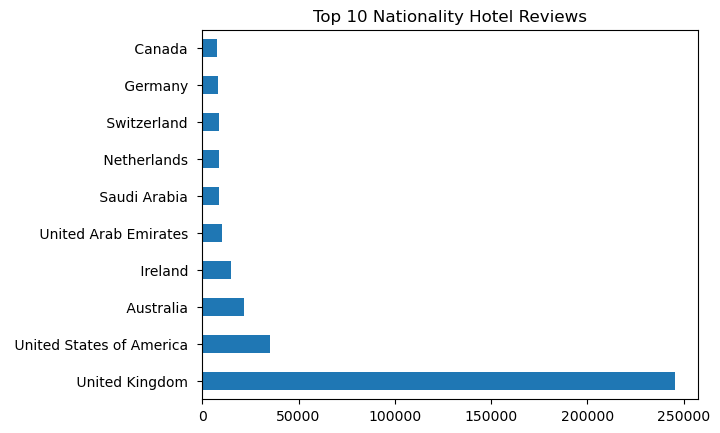

In [5]:
# Kita ingin tau reviewer ini banyak berasal dari mana aja?
nat_reviewer = df['Reviewer_Nationality'].value_counts()
nat_reviewer.head(10).plot(kind='barh', title='Top 10 Nationality Hotel Reviews')
plt.ylabel("")
plt.show()

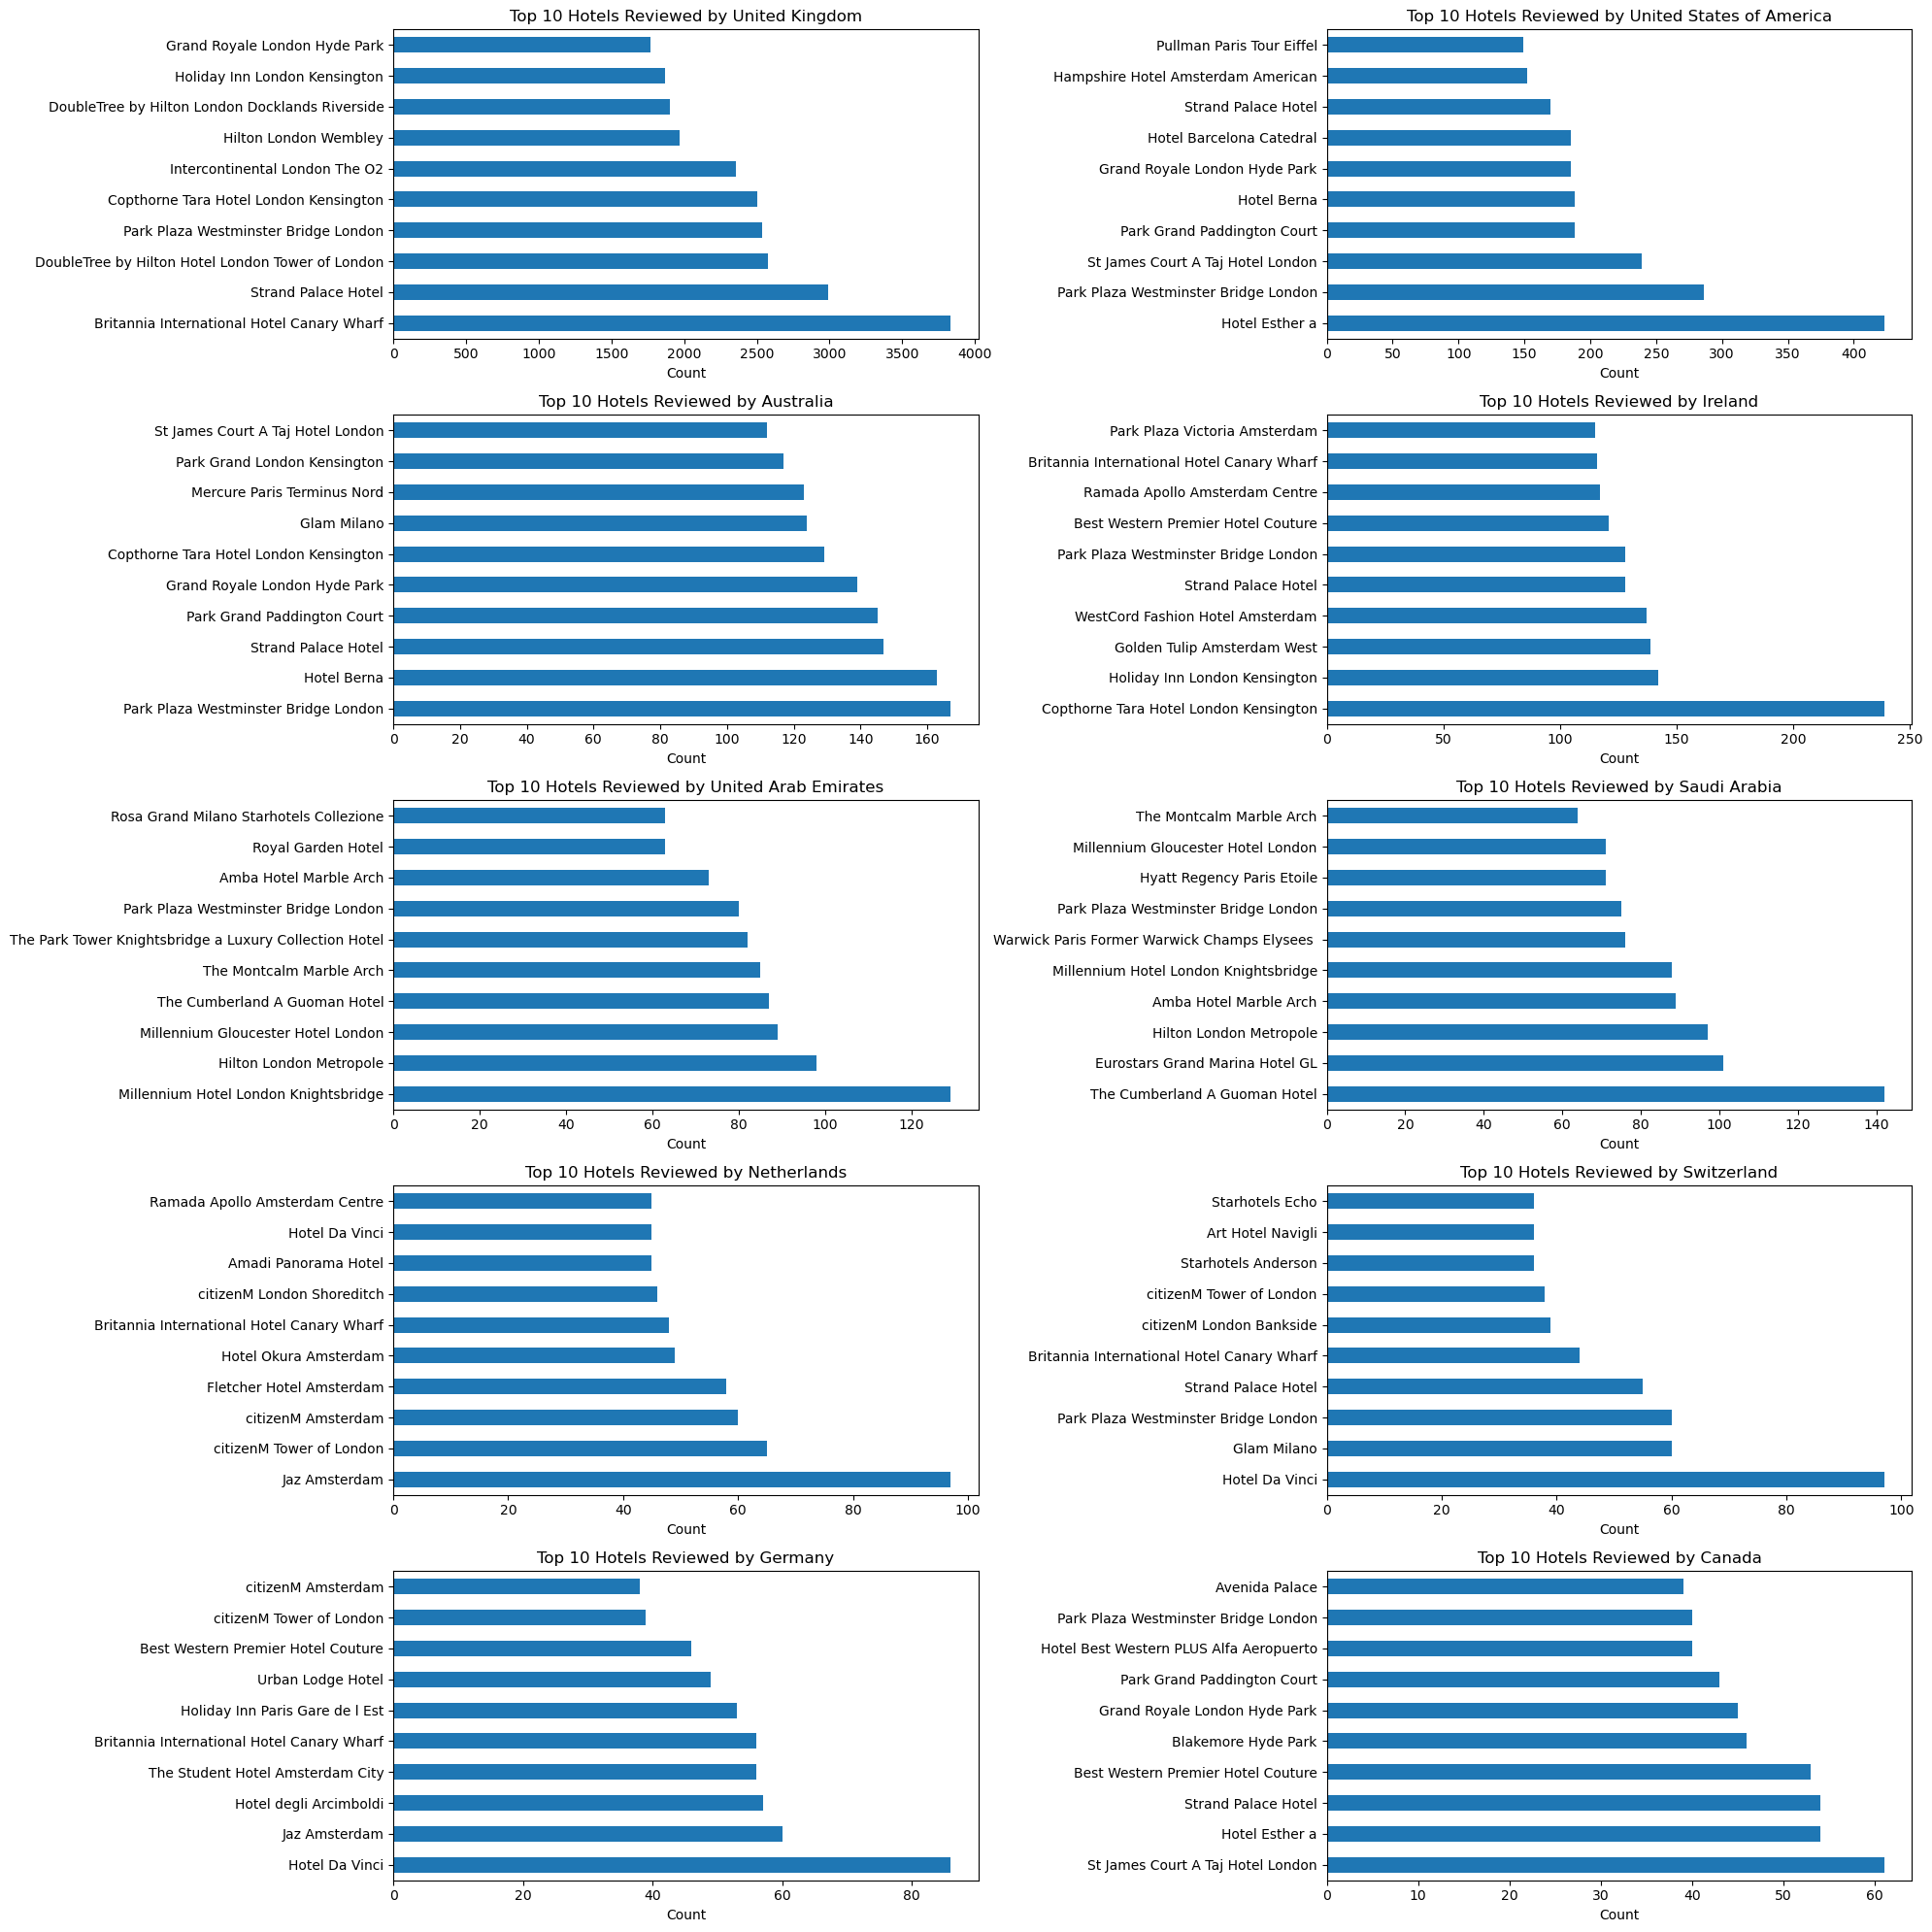

In [6]:
# Hotel apa paling sering direview oleh setiap negarawan?
fig,ax = plt.subplots(nrows=5, ncols=2, figsize=(20,20))
for i, nat in enumerate(nat_reviewer.index[:10]):
    rows = i // 2
    cols = i % 2

    nat_df = df[df['Reviewer_Nationality'] == nat]
    hotel = nat_df['Hotel_Name'].value_counts().head(10) # Banyaknya review hotel per negara
    hotel.plot(kind='barh', ax=ax[rows, cols])

    ax[rows, cols].set_title(f'Top 10 Hotels Reviewed by {nat.strip()}')
    ax[rows, cols].set_ylabel('')
    ax[rows, cols].set_xlabel('Count')

plt.tight_layout()
plt.show()

In [7]:
# Mari kita coba hitung jumlah review yang ditemukan dalam data dan kita bandingkan dengan yang terdapat dalam columns Total_Number_of_Reviews 
reviews_df = df[['Hotel_Name', 'Total_Number_of_Reviews']]

# Sebagai Perbandingan dengan number of Reviews saja
reviews_df['Total_Reviews_Founds'] = reviews_df.groupby('Hotel_Name').transform('count')

# Remove Duplicates
reviews_df = reviews_df.drop_duplicates(subset=['Hotel_Name'])

# Urutkan
reviews_df = reviews_df.sort_values(by='Total_Reviews_Founds', ascending=False)
reviews_df = reviews_df.reset_index().drop('index', axis=1)
reviews_df

C:\Users\ACER\AppData\Local\Temp\ipykernel_22500\1470349441.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_df['Total_Reviews_Founds'] = reviews_df.groupby('Hotel_Name').transform('count')


,Hotel_Name,Total_Number_of_Reviews,Total_Reviews_Founds
0,Britannia International Hotel Canary Wharf,9086,4789
1,Strand Palace Hotel,9568,4256
2,Park Plaza Westminster Bridge London,12158,4169
3,Copthorne Tara Hotel London Kensington,7105,3578
4,DoubleTree by Hilton Hotel London Tower of London,7491,3212
...,...,...,...
1487,Ibis Styles Milano Palmanova,207,12
1488,Hotel Eitlj rg,131,12
1489,Hotel Wagner,135,10
1490,Mercure Paris Porte d Orleans,110,10


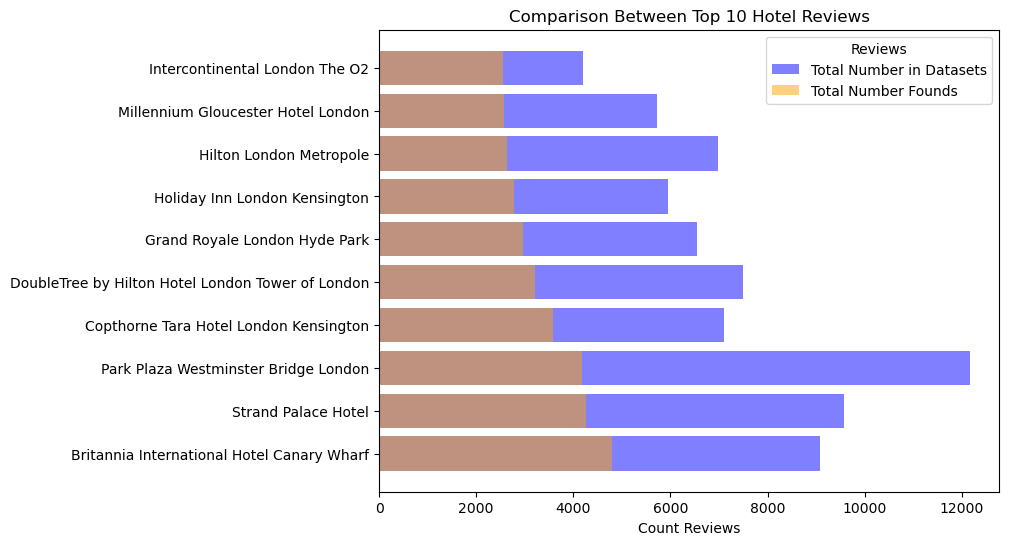

In [8]:
# Kita coba buat visualisasikan
top10_hotels = reviews_df.head(10)

# Setup
fig, ax = plt.subplots(figsize=(8,6))
bars1 = ax.barh(y=top10_hotels['Hotel_Name'], width=top10_hotels['Total_Number_of_Reviews'],
                label='Total Number in Datasets', color='blue', alpha=0.5)
bars2 = ax.barh(y=top10_hotels['Hotel_Name'], width=top10_hotels['Total_Reviews_Founds'],
                label='Total Number Founds', color='orange', alpha=0.5)

ax.set_xlabel('Count Reviews')
ax.set_title('Comparison Between Top 10 Hotel Reviews')
ax.legend(title='Reviews')    
plt.show()

In [9]:
# Sekarang bagaimana kalau kita bandingkan Colom average score dengan kita hitung sendiri average scorenya di Reviewer score
df['Calc_Average_Score'] = round(df.groupby('Hotel_Name')['Reviewer_Score'].transform('mean'), 1)

# Sekarang kita hitung selisih perbedaan antara kolom di dataset dengan yang kita hitung tadi
def hitung_perbedaan_avg(row):
    return row['Calc_Average_Score'] - row['Average_Score']

df['Average_Score_Difference'] = df.apply(hitung_perbedaan_avg, axis=1)

average_score = df.drop_duplicates(subset=['Hotel_Name'])

# Display Average Score
average_score = average_score.sort_values(by=['Average_Score_Difference'])
average_score[['Hotel_Name', 'Average_Score', 'Calc_Average_Score', 
               'Average_Score_Difference']]

,Hotel_Name,Average_Score,Calc_Average_Score,Average_Score_Difference
3813,Kube Hotel Ice Bar,7.2,5.9,-1.3
250308,MARQUIS Faubourg St Honor Relais Ch teaux,8.6,7.7,-0.9
68936,Villa Eugenie,6.8,5.9,-0.9
22189,Holiday Inn Paris Montparnasse Pasteur,7.1,6.3,-0.8
151416,Best Western Allegro Nation,7.8,7.1,-0.7
...,...,...,...,...
54745,Hotel Les Rives de Notre Dame,8.6,9.1,0.5
111027,Hotel Stendhal Place Vend me Paris MGallery by...,8.8,9.5,0.7
178253,Renaissance Paris Vendome Hotel,7.9,8.6,0.7
43688,Mercure Paris Porte d Orleans,7.5,8.2,0.7


In [10]:
df.Negative_Review.value_counts()[:10]

Negative_Review
No Negative    127890
 Nothing        14295
 Nothing         4236
 nothing         2225
 N A             1037
 None             984
                  849
 N a              509
 Breakfast        407
 Small room       373
Name: count, dtype: int64

In [11]:
# Sekarang kita ingin mengekstrak negatif review yang salah kaprah
no_negative_reviews = df[df['Negative_Review'].str.contains('No Negative|Nothing|N A|None|  ')].shape[0]

# Lakukan juga di positive review
no_positive_reviews = df[df['Positive_Review'].str.contains('No Positive|Nothing|N A|None')].shape[0]

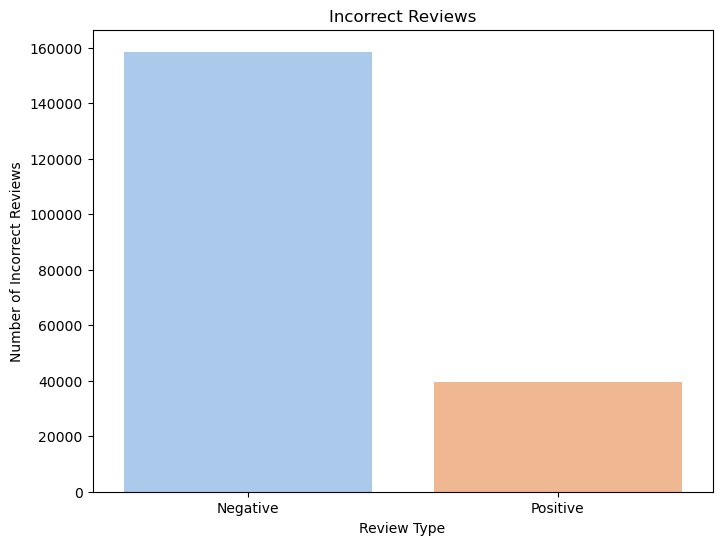

In [12]:
# Sekarang kita coba visualisasikan menggunakan seaborn
salah_reviews = pd.DataFrame({
    'Review Type': ['Negative', 'Positive'],
    'Incorect Reviews': [no_negative_reviews, no_positive_reviews]
})

# Visualize
plt.figure(figsize=(8, 6))
sns.barplot(data=salah_reviews, x='Review Type', y='Incorect Reviews', 
            palette='pastel')
plt.title('Incorrect Reviews')
plt.xlabel('Review Type')
plt.ylabel('Number of Incorrect Reviews')
plt.show()

## Clean The Data untuk melakukan Sentiment Analysis

In [13]:
# Buang Columns Lat dan lng karena kita tidak memerlukannya
df.drop(['lat', 'lng'], inplace=True, axis=1)

In [14]:
# Perbarui Kolom Hotel Address: Kota, Negara
def city_country(row):
    if 'London' in row['Hotel_Address']:
        return 'London, United Kingdom'
    elif 'Paris' in row['Hotel_Address']:
        return 'Paris, France'
    elif 'Milan' in row['Hotel_Address']:
        return 'Milan, Italy'
    elif 'Vienna' in row['Hotel_Address']:
        return 'Vienna, Austria'
    elif 'Amsterdam' in row['Hotel_Address']:
        return 'Amsterdam, Netherlands'
    elif 'Barcelona' in row['Hotel_Address']:
        return 'Barcelona, Spain'
    
df['Hotel_Address'] = df.apply(city_country, axis=1)

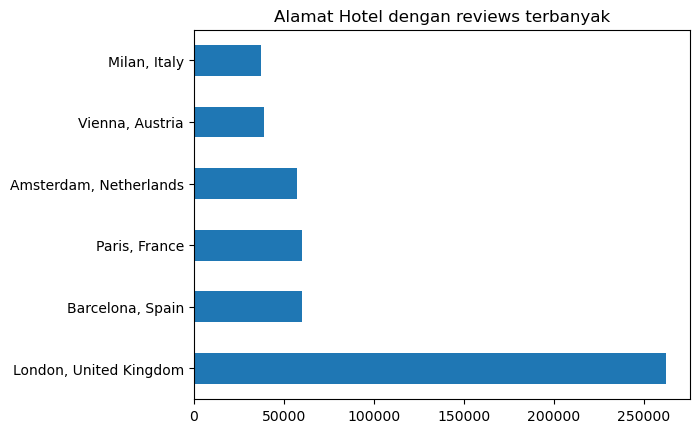

In [15]:
# Coba Visualisasikan
df['Hotel_Address'].value_counts().plot(kind='barh')
plt.title('Alamat Hotel dengan reviews terbanyak')
plt.ylabel('')
plt.show()

Grafik diatas menunjukkan alamat hotel yang paling sering direviews di dalam dataset ini. Masih belum tau, apakah grafik ini bisa berkorelasi dengan banyaknya pengunjung yang memesan hotel di negara tersebut atau satu hal lainnya. 

Sekarang mari kita cari tau, berapa banyak hotel dalam sauatu negara dalam dataset ini

In [16]:
df.groupby('Hotel_Address').agg({'Hotel_Name': 'nunique'})

,Hotel_Name
Hotel_Address,
"Amsterdam, Netherlands",105
"Barcelona, Spain",211
"London, United Kingdom",400
"Milan, Italy",162
"Paris, France",458
"Vienna, Austria",158


In [17]:
# Drop Columns yang tidak diperlukan lainnya
df.drop(['Additional_Number_of_Scoring', 'Review_Date',
        'Review_Total_Negative_Word_Counts', 'Review_Total_Positive_Word_Counts',
        'days_since_review', 'Total_Number_of_Reviews_Reviewer_Has_Given',
        'Calc_Average_Score', 'Average_Score_Difference']
        , axis=1, inplace=True)

In [18]:
# Banyak columns yang ga konsisten di dataset ini, sekarang ayo kita normalizekan
df['Total_Number_of_Reviews'] = df.groupby('Hotel_Name')['Reviewer_Score'] \
                    .transform('count')
df['Average_Score'] = round(df.groupby('Hotel_Name')['Reviewer_Score']\
                        .transform('mean'), 1)

In [19]:
df['Tags'] = df.Tags.str.strip("[']")
df['Tags'] = df.Tags.str.replace(" ', '", ",")

In [20]:
# Extract Specific Tags
df['Lenght of Stay'] = df['Tags'].str.extract(r'(Stayed \d+ \w+)')
df['Type of Room'] = df['Tags'].str.extract(r'(\w+ Room|\w+ \w+ Room|\w+ \w+ \w+ Room|\w+ \w+ \w+ \w+ Room)')

In [21]:
# Saving new data file with calculated columns
print("Saving results to Hotel_Reviews_Filtered.csv")
df.to_csv(r'./Hotel_Reviews_Filtered.csv', index = False)

Saving results to Hotel_Reviews_Filtered.csv


## Sentiment Analysis

In [24]:
import time
import pandas as pd
import nltk as nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [25]:
from nltk.corpus import stopwords

# Stopwords itu kata-kata yang digunakan dalam bahasa manusia
# yang tidak diolah dalam komputer

cache = set(stopwords.words("english"))
def remove_stopwords(review):
    text = " ".join([word for word in review.split() if word not in cache])
    return text    

In [28]:
df['Negative_Review'] = df.Negative_Review.apply(remove_stopwords)  
df['Positive_Review'] = df.Positive_Review.apply(remove_stopwords)

In [31]:
# Performing Sentiment Analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def calc_sentiment(review):
    if review == "No Negative" or review == "No Positive":
        return 0
    return analyzer.polarity_scores(review)['compound']

In [32]:
# Calculating
start = time.time()
df['Negative_Sentiment'] = df.Negative_Review.apply(calc_sentiment)
df['Positive_Sentiment'] = df.Positive_Review.apply(calc_sentiment)
end = time.time()
print("Dibutuhkan waktu " + str(round(end - start, 2)) + " seconds")

Dibutuhkan waktu: 1708960902.0717182


In [33]:
df.head()

,Hotel_Address,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Total_Number_of_Reviews,Positive_Review,Reviewer_Score,Tags,Lenght of Stay,Type of Room,Negative_Sentiment,Positive_Sentiment
0,"Amsterdam, Netherlands",7.8,Hotel Arena,Russia,I angry made post available via possible sites...,405,Only park outside hotel beautiful,2.9,"Leisure trip, Couple, Duplex Double Room, Sta...",Stayed 6 nights,Duplex Double Room,-0.9543,0.5994
1,"Amsterdam, Netherlands",7.8,Hotel Arena,Ireland,No Negative,405,No real complaints hotel great great location ...,7.5,"Leisure trip, Couple, Duplex Double Room, Sta...",Stayed 4 nights,Duplex Double Room,0.0000,0.9538
2,"Amsterdam, Netherlands",7.8,Hotel Arena,Australia,Rooms nice elderly bit difficult rooms two sto...,405,Location good staff ok It cute hotel breakfast...,7.1,"Leisure trip, Family with young children, Dup...",Stayed 3 nights,Duplex Double Room,-0.1280,0.8720
3,"Amsterdam, Netherlands",7.8,Hotel Arena,United Kingdom,My room dirty I afraid walk barefoot floor loo...,405,Great location nice surroundings bar restauran...,3.8,"Leisure trip, Solo traveler, Duplex Double Ro...",Stayed 3 nights,Duplex Double Room,-0.8176,0.9260
4,"Amsterdam, Netherlands",7.8,Hotel Arena,New Zealand,You When I booked company line showed pictures...,405,Amazing location building Romantic setting,6.7,"Leisure trip, Couple, Suite, Stayed 2 nights,...",Stayed 2 nights,NaN,-0.1022,0.7579


In [36]:
df = df.sort_values(by=["Negative_Sentiment"], ascending=False)
display(df[["Negative_Review", "Negative_Sentiment"]])
df = df.sort_values(by=["Positive_Sentiment"], ascending=False)
display(df[["Positive_Review", "Positive_Sentiment"]])

,Negative_Review,Negative_Sentiment
480509,I travel lot far visited countless number hote...,0.9957
339189,Guys I like hotel I wish return next year Howe...,0.9948
278506,The property great location There bakery next ...,0.9945
138365,Wifi terribly slow I speed test network upload...,0.9938
79215,I find anything hotel first I walked past hote...,0.9938
...,...,...
452092,No WLAN room Incredibly rude restaurant staff ...,-0.9884
201953,Everything DO NOT STAY AT THIS HOTEL I never i...,-0.9886
307286,The staff Had bad experience even booking Janu...,-0.9889
129503,First charged twice room booked booking second...,-0.9896


,Positive_Review,Positive_Sentiment
179007,We went Andaz 40th birthday celebration This a...,0.9991
287419,When first arrived hotel staff incredibly frie...,0.9987
132492,We arrived super cute boutique hotel area expl...,0.9987
293710,This place surprise expected good actually gre...,0.9985
417442,We celebrated wedding night Langham I commend ...,0.9985
...,...,...
489137,Very rude manager abusive staff reception Dirt...,-0.9703
124178,I didnt like anythig Room small Asked upgrade ...,-0.9721
64158,get everything extra internet parking breakfas...,-0.9751
5839,I completely disappointed mad since reception ...,-0.9780


In [39]:
arange_cols = ["Hotel_Name", "Hotel_Address", "Total_Number_of_Reviews", "Average_Score", 
"Reviewer_Score", "Negative_Sentiment", "Positive_Sentiment", "Reviewer_Nationality", 
'Tags', 'Lenght of Stay', 'Type of Room', "Negative_Review", "Positive_Review"]

df = df.reindex(arange_cols, axis=1)
df.head()

,Hotel_Name,Hotel_Address,Total_Number_of_Reviews,Average_Score,Reviewer_Score,Negative_Sentiment,Positive_Sentiment,Reviewer_Nationality,Tags,Lenght of Stay,Type of Room,Negative_Review,Positive_Review
179007,Andaz London Liverpool Street,"London, United Kingdom",519,9.0,10.0,0.0000,0.9991,Belgium,"Leisure trip, Couple, Queen Room, Stayed 2 ni...",Stayed 2 nights,Queen Room,There nothing really nothing,We went Andaz 40th birthday celebration This a...
287419,Thistle Holborn The Kingsley,"London, United Kingdom",709,8.6,10.0,0.0000,0.9987,United Kingdom,"Leisure trip, Couple, Deluxe Double Room, Sta...",Stayed 2 nights,Deluxe Double Room,No Negative,When first arrived hotel staff incredibly frie...
132492,Grand Pigalle Hotel,"Paris, France",114,9.2,9.6,0.6124,0.9987,United States of America,"Leisure trip, Couple, Room Sous les Toits 18m...",Stayed 1 night,NaN,The highest floor elevator access take elevato...,We arrived super cute boutique hotel area expl...
293710,Hotel Barcelona Catedral,"Barcelona, Spain",870,9.2,9.6,0.0000,0.9985,United States of America,"Leisure trip, Couple, Double or Twin Room 1 2...",Stayed 1 night,Double or Twin Room,The restaurant closed weekends dozens restaura...,This place surprise expected good actually gre...
417442,The Langham London,"London, United Kingdom",559,9.3,10.0,0.9426,0.9985,United Kingdom,"Leisure trip, Solo traveler, Executive Room, ...",Stayed 1 night,Executive Room,Absolutely nothing bad speak Langham excelled ...,We celebrated wedding night Langham I commend ...


In [40]:
print("Saving results to Hotel_Reviews_NLP.csv")
df.to_csv(r"./Hotel_Reviews_NLP.csv", index = False)

Saving results to Hotel_Reviews_NLP.csv
